In [40]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02 # step size in mesh
names = ["Linear Discriminant Analysis", "Quadratic Discriminant Analysis"]
classifiers = [LinearDiscriminantAnalysis(), QuadraticDiscriminantAnalysis()]



In [41]:
# ランダムな2クラス識別問題用のデータを生成
# 2次元の入力データXと、2クラスのラベルデータyをそれぞれ100サンプル生成
X, y = make_classification(n_features=2, n_samples=100, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1, n_classes=2)
rng=np.random.RandomState(0) # 乱数生成器のクラス、数字はシードなので何でもよい
X += 2 * rng.uniform(size=X.shape) # 元のデータを加工
linearly_separable = (X, y)
datasets = [make_moons(noise=0.25, random_state=0),
            make_circles(noise=0.2, factor=0.6, random_state=1),
            linearly_separable
            ]

<IPython.core.display.Javascript object>


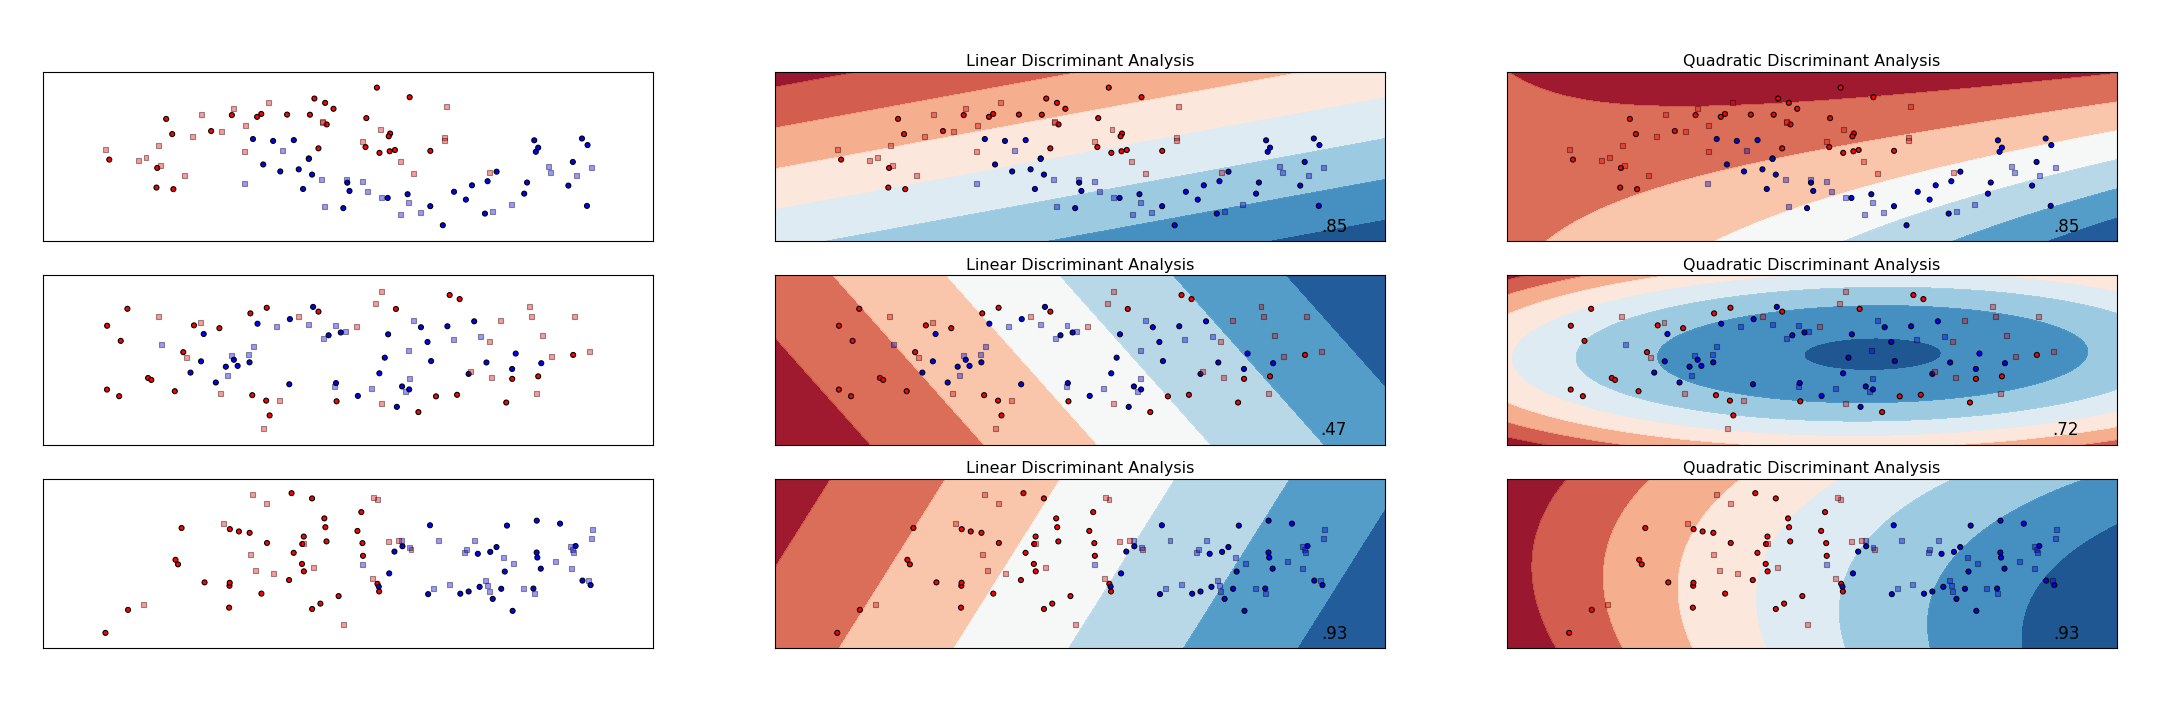

In [42]:
i = 1
figure = plt.figure(figsize=(27, 9))
# 3種類のデータセットでループ
for ds in datasets:
    # データの前処理、トレーニング用とテスト用にデータセット分割
    X, y = ds
    X = StandardScaler().fit_transform(X) # データを正規化
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)
    
    x_min, x_max = X[:, 0].min(0) - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min(0) - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # データセットのみをプロット
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright) # トレーニング用
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, marker='s', alpha=0.4) # テスト用
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    
    # 識別機でループ
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        
        # 決定境界をプロットするため、格子状の各点での推定値を計算。
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) # 決定境界からの距離
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1] # 確率
        
        # カラープロット
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8) # 格子状データ
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright) # トレーニング用データ点
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, marker='s', alpha=0.4) # テスト用データ点

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()